## overview:
Our primary objective is to analyze the impact of the COVID-19 pandemic on employment in India. We are examining data that provides insights into unemployment rates across various states. This dataset includes key information such as state names, observation dates, measurement frequency, unemployment percentages, estimated employment figures, and workforce participation rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
spl_1=pd.read_csv('D:/project/.venv/Internship/covid Unemployement visulization/Unemployment in India.csv')
spl_2=pd.read_csv('D:/project/.venv/Internship/covid Unemployement visulization/Unemployment_Rate_upto_11_2020.csv')

In [3]:
spl_1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
spl_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
spl_1.shape

(768, 7)

## Exploratory Data Analaysis

In [6]:
spl_1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
spl_1.columns=spl_1.columns.str.strip()

In [8]:
spl_1.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Region': 'States'
}, inplace=True)

In [9]:
spl_1.columns

Index(['States', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area'],
      dtype='object')

# Handling missing Values

In [10]:
spl_1.isnull().sum()

States                       28
Date                         28
Frequency                    28
Unemployment Rate            28
Employed                     28
Labour Participation Rate    28
Area                         28
dtype: int64

## Around 3.64% data NA so drop the NA data

In [11]:
spl_1=spl_1.dropna()
spl_1.isnull().sum()

States                       0
Date                         0
Frequency                    0
Unemployment Rate            0
Employed                     0
Labour Participation Rate    0
Area                         0
dtype: int64

In [12]:
spl_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   States                     740 non-null    object 
 1   Date                       740 non-null    object 
 2   Frequency                  740 non-null    object 
 3   Unemployment Rate          740 non-null    float64
 4   Employed                   740 non-null    float64
 5   Labour Participation Rate  740 non-null    float64
 6   Area                       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
spl_1.duplicated().sum()

0

In [14]:
spl_1['Date']=pd.to_datetime(spl_1['Date'])
spl_1['Day']=spl_1['Date'].dt.day
spl_1['Month']=spl_1['Date'].dt.month_name()
spl_1['Year']=spl_1['Date'].dt.year

In [15]:
spl_1

,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


In [16]:
spl_1["States"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [17]:
spl_1['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [18]:
spl_1['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [19]:
spl_1.to_csv('modified_data_1.csv',index=False)

In [19]:
#Mean of employee rate
Mean_unemployement_rate=spl_1['Unemployment Rate'].mean()
meadian_unemployement_rate=spl_1['Unemployment Rate'].median()


print(f'Mean of unemployement:{Mean_unemployement_rate:.1f}%')
print(f'Median of unemployement:{meadian_unemployement_rate:.1f}%')

Mean of unemployement:11.8%
Median of unemployement:8.3%


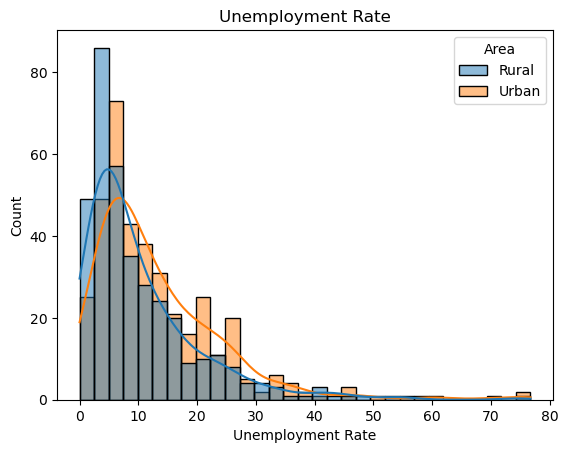

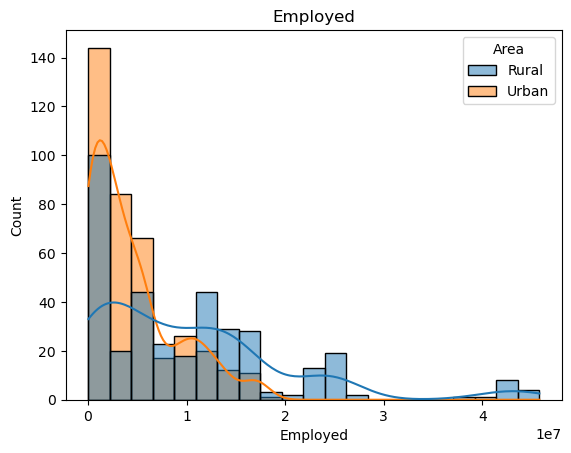

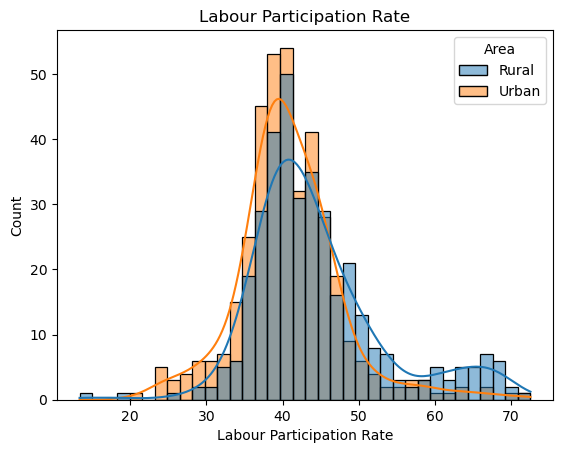

In [20]:
a=['Unemployment Rate','Employed','Labour Participation Rate']
for i in a:
    sns.histplot(x=i,data=spl_1,hue='Area',kde=True)
    plt.title(i)
    plt.show()

# Unemployment Over the Period

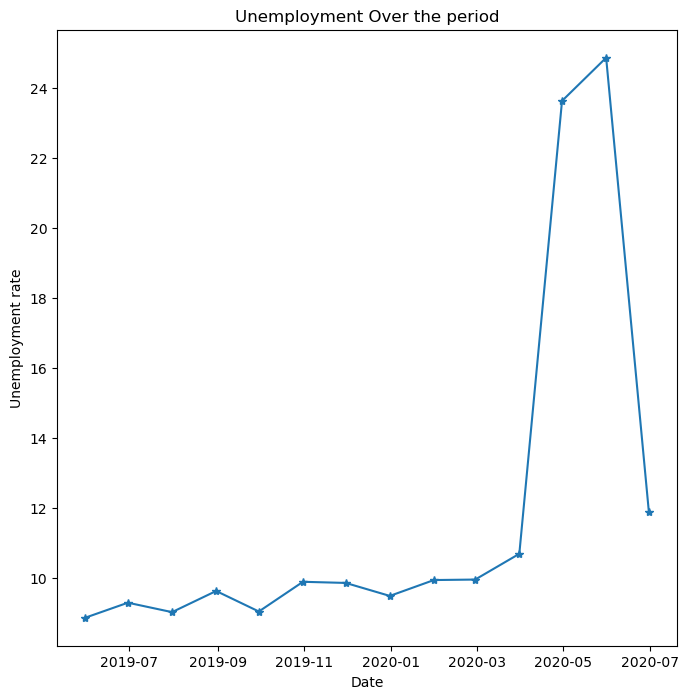

In [21]:
Mean_unemployement_1=spl_1.groupby('Date')['Unemployment Rate'].mean()

plt.figure(figsize=(8,8))
plt.plot(Mean_unemployement_1.index,Mean_unemployement_1.values,marker='*')
plt.xlabel("Date")
plt.ylabel("Unemployment rate")
plt.title("Unemployment Over the period")
plt.show()



In [22]:
plot_1=px.bar(spl_1,x='Month',y='Employed',title="Employed based on Month",color='Employed')
plot_1.show()

# Average unployment State wise

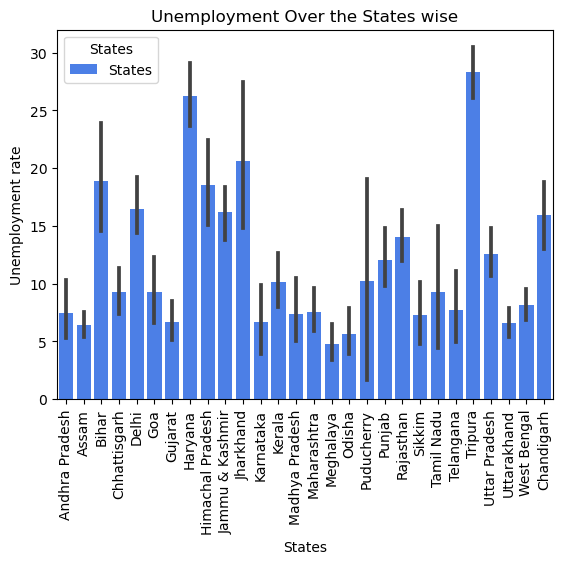

In [23]:
Mean_unemployement_2=spl_1.groupby('States')['Unemployment Rate'].mean()

sns.barplot(data=spl_1,x='States',y='Unemployment Rate',label='States',color='#3377FF')
plt.xlabel("States")
plt.ylabel("Unemployment rate")
plt.title("Unemployment Over the States wise")
plt.legend(title='States')
plt.xticks(rotation='vertical')
plt.show()


# Sunburst Visulization

In [25]:
plot_2=px.sunburst(spl_1,path=['States','Area'],values='Unemployment Rate',title='Unemployment rate By States and Area',color_continuous_scale='RdBu')
plot_2.show()

Text(0.5, 1.0, 'Percentage of unemployment in Area wise')

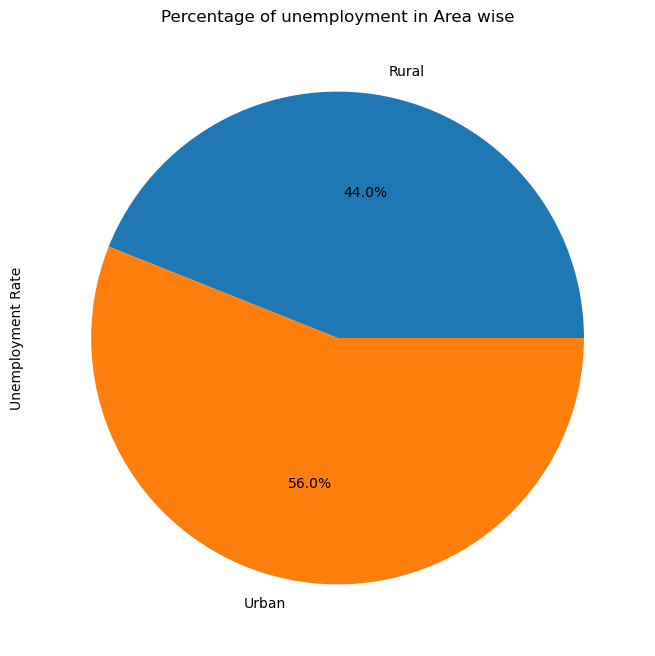

In [28]:
plt.figure(figsize=(8,8))
spl_1.groupby('Area')['Unemployment Rate'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of unemployment in Area wise')

In [29]:
spl_1.columns

Index(['States', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate', 'Area', 'Day', 'Month', 'Year'],
      dtype='object')

## Corelation Heatmap

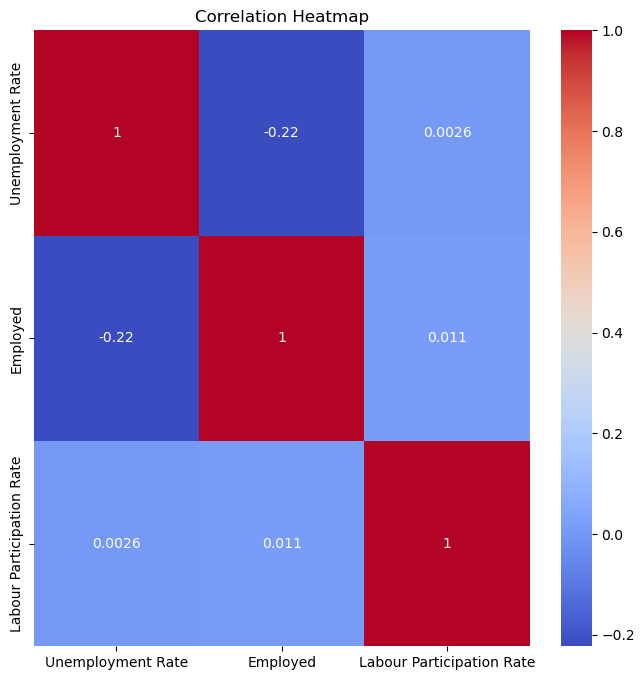

In [30]:
corr=spl_1[['Unemployment Rate','Employed','Labour Participation Rate']].corr()

#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

#  Year 2020 unemployed Data  
## EDA

In [20]:
spl_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [21]:
spl_2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [22]:
spl_2.columns=spl_2.columns.str.strip()

In [23]:
spl_2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [24]:
spl_2.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate',
    'Region': 'States',
    'Region.1': 'Area'
}, inplace=True)

In [25]:
spl_2.head()

,States,Date,Frequency,Unemployment Rate,Employed,Labour Participation Rate,Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# Missing values & duplicate

In [26]:
spl_2.isnull().sum()

States                       0
Date                         0
Frequency                    0
Unemployment Rate            0
Employed                     0
Labour Participation Rate    0
Area                         0
longitude                    0
latitude                     0
dtype: int64

In [27]:
spl_2.duplicated().sum()

0

In [28]:
spl_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   States                     267 non-null    object 
 1   Date                       267 non-null    object 
 2   Frequency                  267 non-null    object 
 3   Unemployment Rate          267 non-null    float64
 4   Employed                   267 non-null    int64  
 5   Labour Participation Rate  267 non-null    float64
 6   Area                       267 non-null    object 
 7   longitude                  267 non-null    float64
 8   latitude                   267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [29]:
spl_2['Date']=pd.to_datetime(spl_2['Date'])
spl_2['Day']=spl_2['Date'].dt.day
spl_2['Month']=spl_2['Date'].dt.month_name()
spl_2['Year']=spl_2['Date'].dt.year

In [30]:
spl_2['States'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [31]:
spl_2['Frequency'].unique()

array([' M'], dtype=object)

In [32]:
spl_2['Area'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [34]:
#Mean of employee rate
Mean_unemployement_rate_2020=spl_2['Unemployment Rate'].mean()
meadian_unemployement_rate_2020=spl_2['Unemployment Rate'].median()


print(f'Mean of unemployement:{Mean_unemployement_rate_2020:.1f}%')
print(f'Median of unemployement:{meadian_unemployement_rate_2020:.1f}%')

Mean of unemployement:12.2%
Median of unemployement:9.7%


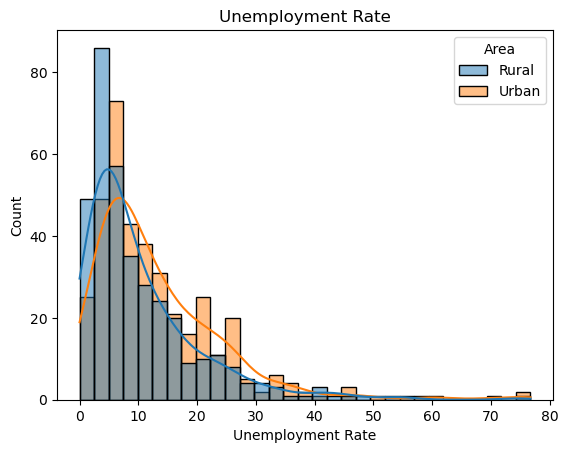

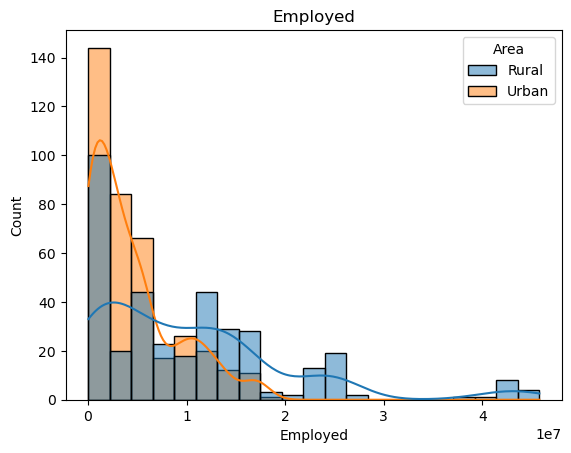

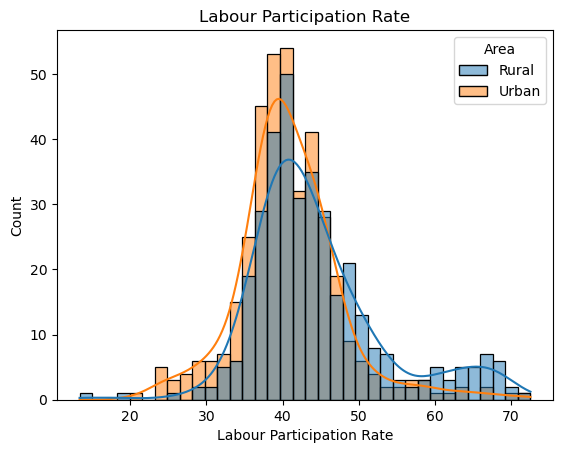

In [35]:
b=['Unemployment Rate','Employed','Labour Participation Rate']
for i in b:
    sns.histplot(x=i,data=spl_1,hue='Area',kde=True)
    plt.title(i)
    plt.show()

# Unemployment Over the Date 

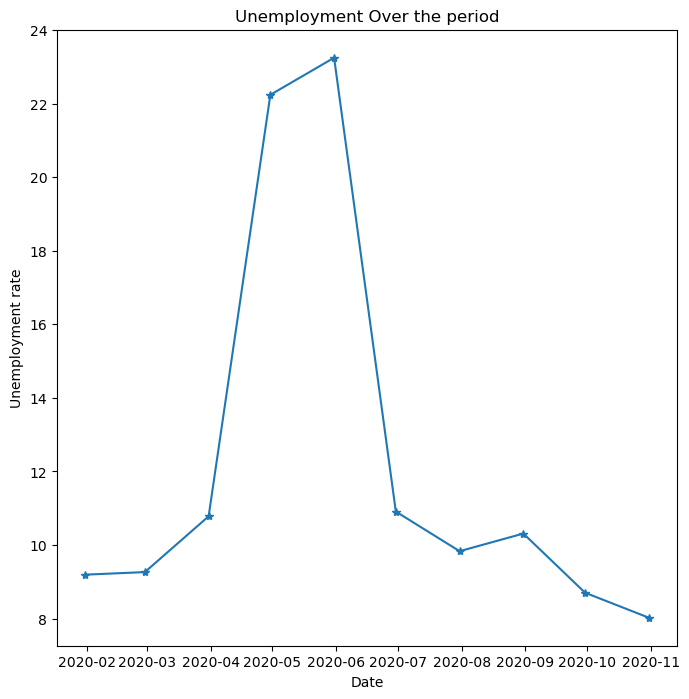

In [36]:
Mean_unemployement_2020=spl_2.groupby('Date')['Unemployment Rate'].mean()

plt.figure(figsize=(8,8))
plt.plot(Mean_unemployement_2020.index,Mean_unemployement_2020.values,marker='*')
plt.xlabel("Date")
plt.ylabel("Unemployment rate")
plt.title("Unemployment Over the period")
plt.show()



In [37]:
plot_3=px.bar(spl_2,x='Month',y='Employed',title="Employed based on Month",color='Employed')
plot_3.show()

# Average Unemployment States wise

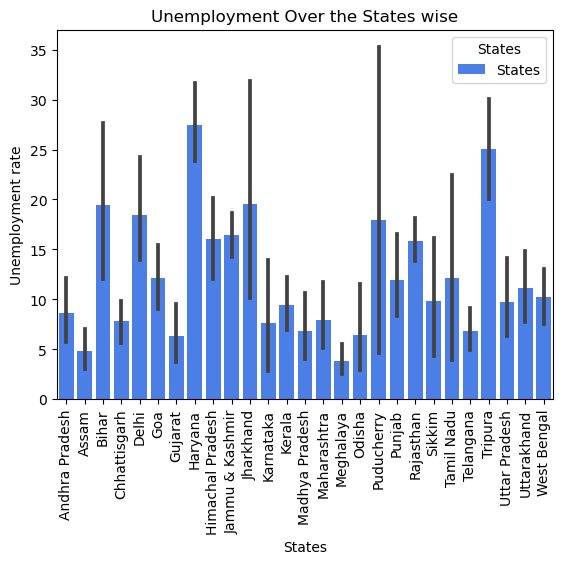

In [38]:
sns.barplot(data=spl_2,x='States',y='Unemployment Rate',label='States',color='#3377FF')
plt.xlabel("States")
plt.ylabel("Unemployment rate")
plt.title("Unemployment Over the States wise")
plt.legend(title='States')
plt.xticks(rotation='vertical')
plt.show()

# sunburst visuliazation

In [39]:
plot_2=px.sunburst(spl_2,path=['States','Area'],values='Unemployment Rate',title='Unemployment rate By States and Area')
plot_2.show()

Text(0.5, 1.0, 'Percentage of unemployment in Area wise')

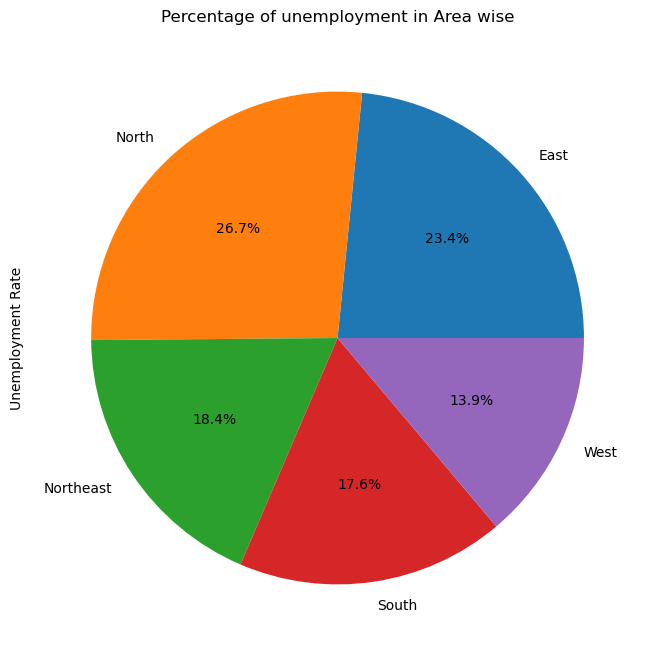

In [40]:
plt.figure(figsize=(8,8))
spl_2.groupby('Area')['Unemployment Rate'].mean().plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of unemployment in Area wise')

# correalation map

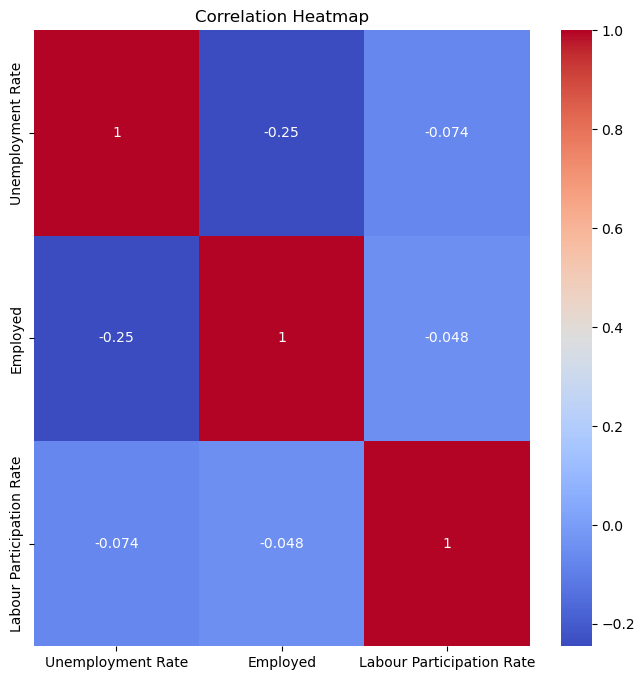

In [41]:
corr=spl_2[['Unemployment Rate','Employed','Labour Participation Rate']].corr()

#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()